In [18]:
# "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

import pandas as pd
import numpy as np


## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

### `Q-1:` 
i. Create a DataFrame birds from the above dictionary data which has the index labels. 

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [34]:
# code here

data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds = pd.DataFrame(data, index = labels)
print(birds.info())
birds.iloc[::2]


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes
None


,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


### `Q-2:` 
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [12]:
# code here

print(birds[['birds','age']].iloc[[0,2,6]])
birds[birds['visits'] < 4]

     birds  age
a   Cranes  3.5
c  plovers  1.5
g  plovers  5.5


,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:` 
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [55]:
# Let's try with isna()
print(birds.isna())
print(birds[birds.isna()])
# Yeah, somethings wrong

   birds    age  visits  priority
a  False  False   False     False
b  False  False   False     False
c  False  False   False     False
d  False   True   False      True
e  False  False   False     False
f  False  False   False     False
g  False  False   False     False
h  False   True   False     False
i  False  False   False     False
j  False  False   False     False
k  False  False   False     False
  birds  age  visits priority
a   NaN  NaN     NaN      NaN
b   NaN  NaN     NaN      NaN
c   NaN  NaN     NaN      NaN
d   NaN  NaN     NaN      NaN
e   NaN  NaN     NaN      NaN
f   NaN  NaN     NaN      NaN
g   NaN  NaN     NaN      NaN
h   NaN  NaN     NaN      NaN
i   NaN  NaN     NaN      NaN
j   NaN  NaN     NaN      NaN
k   NaN  NaN     NaN      NaN


In [58]:
# Now, lets perform AND operation on the rows to get True for rows containing NaN values
# Then, we negate that by comparing the values with False
# Then we pass this negated values as mask / boolean index to birds df

mask = np.array(list(map(bool, list(birds.isna().sum(axis=1).values))))
birds2 = birds[mask == False]
birds2
# Et voila! it works

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


In [76]:
# Filling null values in original 'birds' df
mask = birds2.mode().iloc[0]
print(mask)
birds.fillna(mask, inplace=True)
birds

birds       Cranes
age            3.5
visits         2.0
priority        no
Name: 0, dtype: object


,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [79]:
# Total visits of cranes
birds[birds['birds'] == 'Cranes']['visits'].sum()

14

In [82]:
# Number of each type of bird
birds['birds'].value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [87]:
# No. of duplicate rows
birds.duplicated().sum()

2

In [91]:
# Drop duplicates
birds.drop_duplicates(inplace=True)
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


## Question on IPL data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

### `Q-5:` In IPL matches dataset some teams name has changed. 
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils' 
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams. 

In [92]:
# code here
ipl = pd.read_csv(r"C:\Users\bhagy\Downloads\IPL_Matches_2008_2022.csv")
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [118]:
def func(a):
    match a:
        case 'Delhi Daredevils':
            return 'Delhi Capitals'
        case 'Kings XI Punjab':
            return 'Punjab Kings'
        case 'Rising Pune Supergiants':
            return 'Rising Pune Supergiant'
        case default:
            return a

#For some reason, below code doesn't seem to work
#ipl[['Team1', 'Team2']] = ipl[['Team1','Team2']].apply(func)

ipl['Team1'] = ipl['Team1'].apply(func)
ipl['Team2'] = ipl['Team2'].apply(func)
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

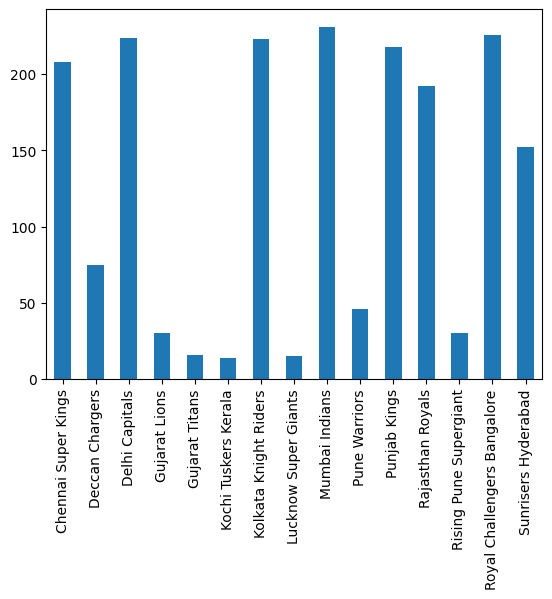

In [134]:
# code here
ipl2 = ipl['Team1'].value_counts().sort_index()
ipl3 = ipl['Team2'].value_counts().sort_index()

# Since, the indices of ipl2 and ipl3 are same, we can add them
ipl2 = ipl2+ipl3

ipl2.plot(kind='bar')

### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [145]:
# code here
mask1 = ipl[(ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')]
mask1['Player_of_Match'].value_counts().sort_values().index[-1]

'RG Sharma'

### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

A Jadeja


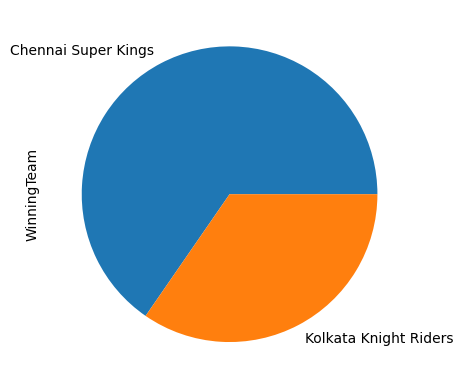

In [154]:
# code here
def tvt(a,b):
    mask1 = ipl[((ipl['Team1'] == a) | (ipl['Team1'] == b)) & (((ipl['Team2'] == a)) | ((ipl['Team2'] == b)))]
    mask1['WinningTeam'].value_counts().plot(kind="pie")
    print(mask1['Player_of_Match'].value_counts().sort_values().index[-1][1:])
    
tvt('Kolkata Knight Riders','Chennai Super Kings')

### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart. 

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



Kolkata      74
Mumbai       23
Abu Dhabi    14
Chennai      12
Bangalore    11
Delhi        10
Pune          9
Name: City, dtype: int64


<Axes: >

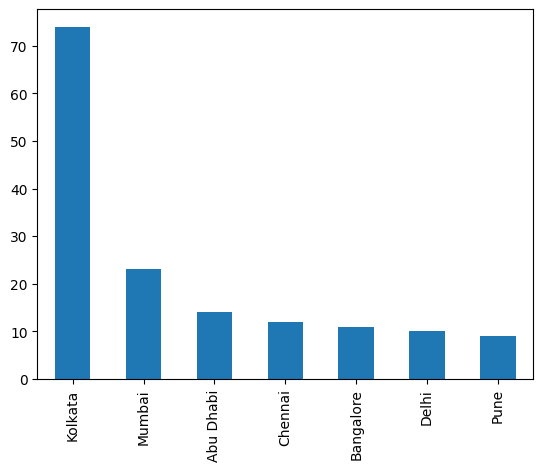

In [160]:
# code here
mask = ipl[(ipl['Team1'] == 'Kolkata Knight Riders') | (ipl['Team2'] == 'Kolkata Knight Riders')]['City']
res = mask.value_counts().head(7)
print(res)
res.plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [169]:
# code here
mask1 = ipl['Season'] == '2011'
mask2 = (ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')
ipl[mask1&mask2]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
703,501270,Chennai,2011-05-27,2011,Qualifier 2,Royal Challengers Bangalore,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,N,Royal Challengers Bangalore,Runs,43.0,NaN,CH Gayle,"['MA Agarwal', 'CH Gayle', 'V Kohli', 'AB de V...","['AC Blizzard', 'SR Tendulkar', 'Harbhajan Sin...",Asad Rauf,SJA Taufel
704,501269,Mumbai,2011-05-25,2011,Elimination Final,Mumbai Indians,Kolkata Knight Riders,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,4.0,NaN,MM Patel,"['AC Blizzard', 'SR Tendulkar', 'RG Sharma', '...","['G Gambhir', 'JH Kallis', 'SP Goswami', 'MK T...",Asad Rauf,SJA Taufel
706,501267,Kolkata,2011-05-22,2011,70,Kolkata Knight Riders,Mumbai Indians,Eden Gardens,Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JEC Franklin,"['JH Kallis', 'SP Goswami', 'G Gambhir', 'MK T...","['TL Suman', 'SR Tendulkar', 'Harbhajan Singh'...",SK Tarapore,SJA Taufel
710,501263,Mumbai,2011-05-20,2011,66,Mumbai Indians,Rajasthan Royals,Wankhede Stadium,Mumbai Indians,bat,N,Rajasthan Royals,Wickets,10.0,NaN,SR Watson,"['TL Suman', 'SR Tendulkar', 'AT Rayudu', 'RG ...","['SR Watson', 'R Dravid', 'J Botha', 'AL Menar...",RE Koertzen,PR Reiffel
718,501256,Mumbai,2011-05-14,2011,59,Mumbai Indians,Deccan Chargers,Wankhede Stadium,Deccan Chargers,bat,N,Deccan Chargers,Runs,10.0,NaN,A Mishra,"['SR Tendulkar', 'AC Blizzard', 'AT Rayudu', '...","['MJ Lumb', 'S Sohal', 'KC Sangakkara', 'JP Du...",S Ravi,SK Tarapore
722,501251,Chandigarh,2011-05-10,2011,54,Punjab Kings,Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,field,N,Kings XI Punjab,Runs,76.0,NaN,BA Bhatt,"['PC Valthaty', 'AC Gilchrist', 'SE Marsh', 'K...","['AC Blizzard', 'SR Tendulkar', 'RG Sharma', '...",SK Tarapore,RJ Tucker
727,501246,Mumbai,2011-05-07,2011,49,Mumbai Indians,Delhi Capitals,Wankhede Stadium,Delhi Daredevils,field,N,Mumbai Indians,Runs,32.0,NaN,AT Rayudu,"['AC Blizzard', 'SR Tendulkar', 'AT Rayudu', '...","['V Sehwag', 'DA Warner', 'CA Ingram', 'NV Ojh...",K Hariharan,SJA Taufel
732,501241,Mumbai,2011-05-04,2011,44,Pune Warriors,Mumbai Indians,Dr DY Patil Sports Academy,Pune Warriors,field,N,Mumbai Indians,Runs,21.0,NaN,R Sharma,"['JD Ryder', 'MK Pandey', 'GC Smith', 'AA Jhun...","['AC Blizzard', 'SR Tendulkar', 'AT Rayudu', '...",HDPK Dharmasena,SJA Taufel
736,501237,Mumbai,2011-05-02,2011,40,Mumbai Indians,Punjab Kings,Wankhede Stadium,Kings XI Punjab,field,N,Mumbai Indians,Runs,23.0,NaN,KA Pollard,"['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'KA...","['PC Valthaty', 'AC Gilchrist', 'SE Marsh', 'D...",HDPK Dharmasena,PR Reiffel
742,501231,Jaipur,2011-04-29,2011,34,Rajasthan Royals,Mumbai Indians,Sawai Mansingh Stadium,Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,J Botha,"['SR Watson', 'R Dravid', 'J Botha', 'LRPL Tay...","['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'RG...",Asad Rauf,SK Tarapore
